# **Kelompok 4**

- Muhamad Yusuf Hidayat
- Farrel Abyansyah
- Gazza Bryan Prilandi

# Data Collection

In [1]:
#library yang diimport
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 

#membuat dataframe pandas, file dataset dipanggil
data= pd.read_excel("reprocessed.hungarian.xlsx",header=None,names=['age','sex','cp','trestbps','chol',
                                                                            'fbs','restecg','thalach','exang','oldpeak','slope',
                                                                            'ca','thal','predicted attribute'])

# Feature Engineering EDA

In [2]:
#EDA = Exploratory Data Analysis (ngeliat datanya gimana, ada yghilang atau nggak)
#fitur dengan banyak missing value dihilangkan 
#missing value = -9
data.pop('ca')
data.pop('thal')


0     -9
1     -9
2     -9
3     -9
4     -9
      ..
289   -9
290   -9
291    6
292   -9
293   -9
Name: thal, Length: 294, dtype: int64

In [3]:
data
#11 fitur 1 label

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,predicted attribute
0,40,1,2,140,289,0,0,172,0,0.0,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,0
292,47,0,2,140,257,0,0,135,0,1.0,1,0


In [4]:
#mencari missing value pada fitur2 yang terdapat pada datasets
print("total number of rows : {0}".format(len(data)))
print("number of rows missing trestbps: {0}".format(len(data.loc[data['trestbps'] == -9])))
print("number of rows missing chol: {0}".format(len(data.loc[data['chol'] == -9])))
print("number of rows missing fbs: {0}".format(len(data.loc[data['fbs'] == -9])))
print("number of rows missing restecg: {0}".format(len(data.loc[data['restecg'] == -9])))
print("number of rows missing thalach: {0}".format(len(data.loc[data['thalach'] == -9])))
print("number of rows missing exang: {0}".format(len(data.loc[data['exang'] == -9])))
print("number of rows missing oldpeak: {0}".format(len(data.loc[data['oldpeak'] == -9])))
print("number of rows missing slope: {0}".format(len(data.loc[data['slope'] == -9])))

total number of rows : 294
number of rows missing trestbps: 1
number of rows missing chol: 23
number of rows missing fbs: 8
number of rows missing restecg: 1
number of rows missing thalach: 1
number of rows missing exang: 1
number of rows missing oldpeak: 0
number of rows missing slope: 190


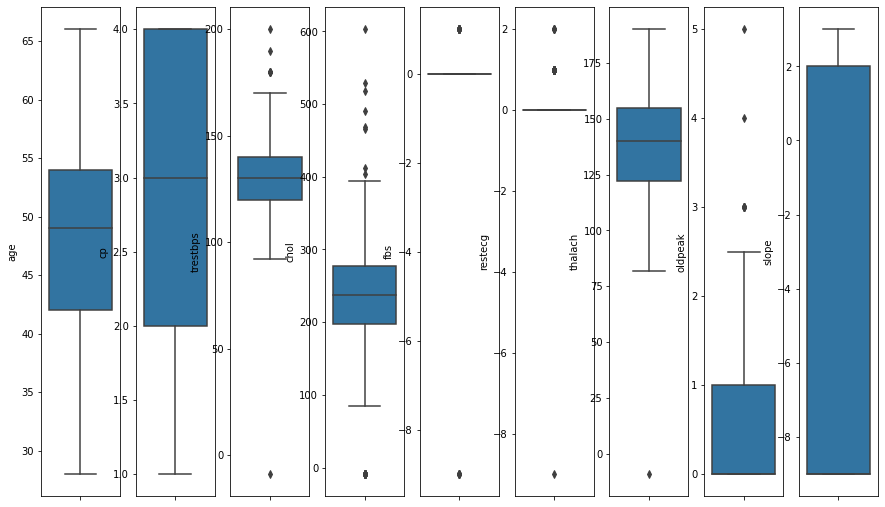

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
feature=['age','cp','trestbps','chol','fbs','restecg','thalach','oldpeak','slope']
fig, ax =plt.subplots(1,9)
fig.set_size_inches(15, 9)
v=0
for i in feature:
    sns.boxplot(y=data[i], ax=ax[v])
    v=v+1
    

# Handling Missing Value

In [6]:
fill_values = SimpleImputer(missing_values=-9, strategy="mean")
imputer=fill_values.fit(data)
data2=imputer.transform(data)
data2

data3=pd.DataFrame(data2, columns=['age','sex','cp','trestbps','chol','fbs','restecg',
                                   'thalach','exang','oldpeak','slope','predicted attribute'])

data3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,predicted attribute
0,40.0,1.0,2.0,140.000000,289.000000,0.0,0.0,172.000000,0.000000,0.0,1.894231,0.0
1,49.0,0.0,3.0,160.000000,180.000000,0.0,0.0,156.000000,0.000000,1.0,2.000000,1.0
2,37.0,1.0,2.0,130.000000,283.000000,0.0,1.0,98.000000,0.000000,0.0,1.894231,0.0
3,48.0,0.0,4.0,138.000000,214.000000,0.0,0.0,108.000000,1.000000,1.5,2.000000,3.0
4,54.0,1.0,3.0,150.000000,250.848708,0.0,0.0,122.000000,0.000000,0.0,1.894231,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,132.583618,308.000000,0.0,1.0,139.129693,0.303754,2.0,1.000000,0.0
290,36.0,1.0,2.0,120.000000,166.000000,0.0,0.0,180.000000,0.000000,0.0,1.894231,0.0
291,48.0,1.0,3.0,110.000000,211.000000,0.0,0.0,138.000000,0.000000,0.0,1.894231,0.0
292,47.0,0.0,2.0,140.000000,257.000000,0.0,0.0,135.000000,0.000000,1.0,1.000000,0.0


In [7]:
data4 = data3[data3['predicted attribute'] <= 1]
data4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,predicted attribute
0,40.0,1.0,2.0,140.000000,289.000000,0.0,0.0,172.000000,0.000000,0.0,1.894231,0.0
1,49.0,0.0,3.0,160.000000,180.000000,0.0,0.0,156.000000,0.000000,1.0,2.000000,1.0
2,37.0,1.0,2.0,130.000000,283.000000,0.0,1.0,98.000000,0.000000,0.0,1.894231,0.0
4,54.0,1.0,3.0,150.000000,250.848708,0.0,0.0,122.000000,0.000000,0.0,1.894231,0.0
5,39.0,1.0,3.0,120.000000,339.000000,0.0,0.0,170.000000,0.000000,0.0,1.894231,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,132.583618,308.000000,0.0,1.0,139.129693,0.303754,2.0,1.000000,0.0
290,36.0,1.0,2.0,120.000000,166.000000,0.0,0.0,180.000000,0.000000,0.0,1.894231,0.0
291,48.0,1.0,3.0,110.000000,211.000000,0.0,0.0,138.000000,0.000000,0.0,1.894231,0.0
292,47.0,0.0,2.0,140.000000,257.000000,0.0,0.0,135.000000,0.000000,1.0,1.000000,0.0


In [8]:
#mencari missing value pada fitur2 yang terdapat pada datasets
print("total number of rows : {0}".format(len(data4)))
print("number of rows missing trestbps: {0}".format(len(data4.loc[data4['trestbps'] == -9])))
print("number of rows missing chol: {0}".format(len(data4.loc[data4['chol'] == -9])))
print("number of rows missing fbs: {0}".format(len(data4.loc[data4['fbs'] == -9])))
print("number of rows missing restecg: {0}".format(len(data4.loc[data4['restecg'] == -9])))
print("number of rows missing thalach: {0}".format(len(data4.loc[data4['thalach'] == -9])))
print("number of rows missing exang: {0}".format(len(data4.loc[data4['exang'] == -9])))
print("number of rows missing oldpeak: {0}".format(len(data4.loc[data4['oldpeak'] == -9])))
print("number of rows missing slope: {0}".format(len(data4.loc[data4['slope'] == -9])))

total number of rows : 225
number of rows missing trestbps: 0
number of rows missing chol: 0
number of rows missing fbs: 0
number of rows missing restecg: 0
number of rows missing thalach: 0
number of rows missing exang: 0
number of rows missing oldpeak: 0
number of rows missing slope: 0


# Handling Imbalance Data

In [9]:
data4['predicted attribute'].value_counts()

0.0    188
1.0     37
Name: predicted attribute, dtype: int64

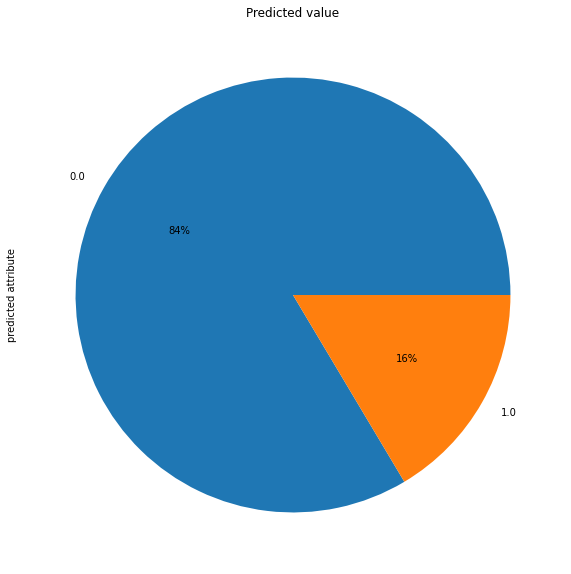

In [10]:
X = data4.drop(['predicted attribute'], axis=1)
y = data4['predicted attribute']
y.value_counts()
y.value_counts().plot(kind='pie',autopct='%2.0f%%',figsize=(10,10))
plt.title('Predicted value')
plt.show()

In [11]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_res, y_res = smote_enn.fit_resample(X, y)

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=1)
X_res, y_res = smote_tomek.fit_resample(X, y)
y_res

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
349    1.0
350    1.0
351    1.0
352    1.0
353    1.0
Name: predicted attribute, Length: 354, dtype: float64

In [12]:
#round up some value
X_res1 = round(X_res)
X_res1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0
3,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,2.0
4,39.0,1.0,3.0,120.0,339.0,0.0,0.0,170.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
349,51.0,1.0,4.0,150.0,238.0,0.0,0.0,124.0,1.0,1.0,2.0
350,47.0,1.0,3.0,140.0,192.0,0.0,0.0,146.0,1.0,1.0,2.0
351,44.0,1.0,4.0,140.0,205.0,0.0,0.0,130.0,1.0,2.0,2.0
352,55.0,1.0,4.0,100.0,248.0,0.0,0.0,129.0,0.0,1.0,2.0


In [13]:
data5=X_res1
data5['predicted attribute']=y_res
data5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,predicted attribute
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,0.0
3,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,2.0,0.0
4,39.0,1.0,3.0,120.0,339.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
349,51.0,1.0,4.0,150.0,238.0,0.0,0.0,124.0,1.0,1.0,2.0,1.0
350,47.0,1.0,3.0,140.0,192.0,0.0,0.0,146.0,1.0,1.0,2.0,1.0
351,44.0,1.0,4.0,140.0,205.0,0.0,0.0,130.0,1.0,2.0,2.0,1.0
352,55.0,1.0,4.0,100.0,248.0,0.0,0.0,129.0,0.0,1.0,2.0,1.0


In [14]:
data5['predicted attribute'].value_counts()

0.0    177
1.0    177
Name: predicted attribute, dtype: int64

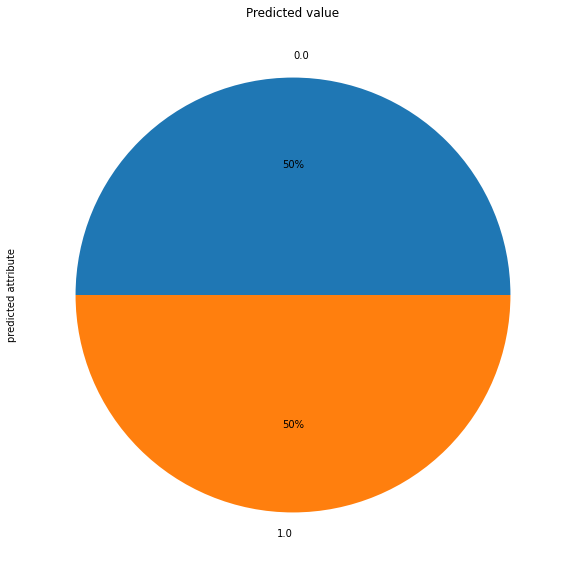

In [15]:
data5['predicted attribute'].value_counts().plot(kind='pie',autopct='%2.0f%%',figsize=(10,10))
plt.title('Predicted value')
plt.show()

# Treating Outliers

In [16]:
Q1=data5['thalach'].quantile(0.25)
Q3=data5['thalach'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)
data5['thalach'].value_counts()

130.0
156.0
26.0
91.0
195.0


140.0    22
150.0    22
170.0    16
160.0    15
130.0    13
         ..
107.0     1
90.0      1
103.0     1
106.0     1
109.0     1
Name: thalach, Length: 80, dtype: int64

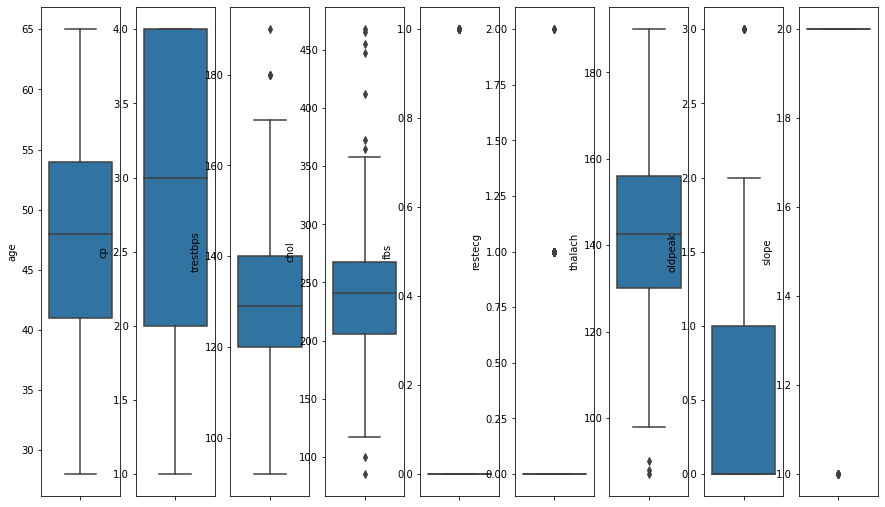

In [17]:
feature=['age','cp','trestbps','chol','fbs','restecg','thalach','oldpeak','slope']
fig, ax =plt.subplots(1,9)
fig.set_size_inches(15, 9)
v=0
for i in feature:
    sns.boxplot(y=data5[i], ax=ax[v])
    v=v+1

C:\Users\hp\scoop\apps\python\current\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

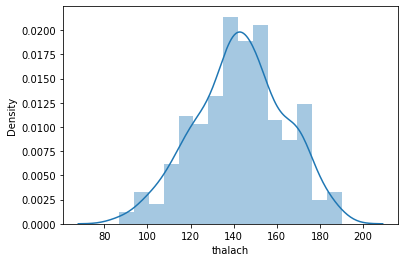

In [18]:
sns.distplot(data5['thalach'])
#data5['restecg'].value_counts()

In [19]:
def uplim(x):
    Q1=data5[x].quantile(0.25)
    Q3=data5[x].quantile(0.75)
    IQR=Q3-Q1
    up=Q3+1.5*IQR
    return up

def dwnlim(x):
    Q1=data5[x].quantile(0.25)
    Q3=data5[x].quantile(0.75)
    IQR=Q3-Q1
    down=Q1-1.5*IQR
    return down


In [20]:
data6 = data5[data5['trestbps'] < uplim('trestbps')]
data6 = data6[(data6['chol'] < uplim('chol')) & (data6['chol'] > dwnlim('chol'))]
data6 = data6[(data6['thalach'] < uplim('thalach')) & (data6['thalach'] > dwnlim('thalach'))]

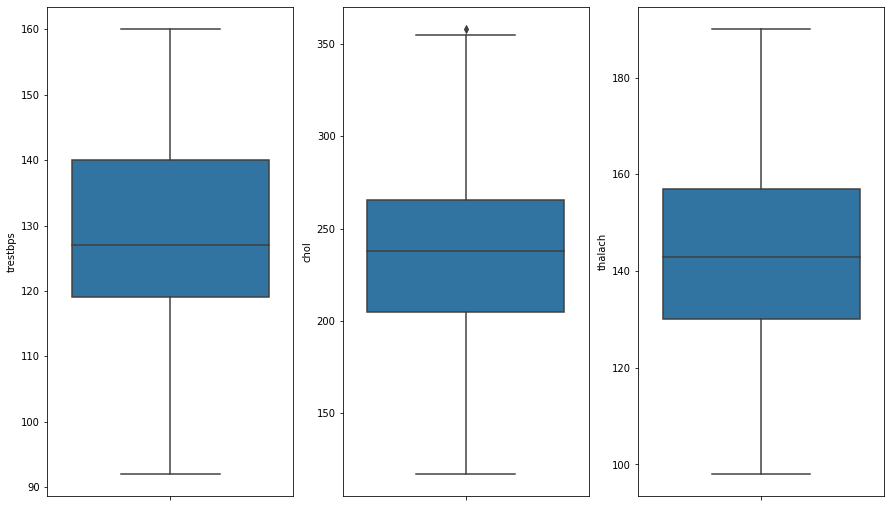

In [21]:
feature=['trestbps','chol','thalach']
fig, ax =plt.subplots(1,3)
fig.set_size_inches(15, 9)
v=0
for i in feature:
    sns.boxplot(y=data6[i], ax=ax[v])
    v=v+1

In [22]:
data6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,predicted attribute
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,0.0
3,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,2.0,0.0
4,39.0,1.0,3.0,120.0,339.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
349,51.0,1.0,4.0,150.0,238.0,0.0,0.0,124.0,1.0,1.0,2.0,1.0
350,47.0,1.0,3.0,140.0,192.0,0.0,0.0,146.0,1.0,1.0,2.0,1.0
351,44.0,1.0,4.0,140.0,205.0,0.0,0.0,130.0,1.0,2.0,2.0,1.0
352,55.0,1.0,4.0,100.0,248.0,0.0,0.0,129.0,0.0,1.0,2.0,1.0


# Split train test sebelum di scaling (Lewat dulu)

# scaling data

In [23]:
normalized_df=(data6-data6.min())/(data6.max()-data6.min())
normalized_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,predicted attribute
0,0.342857,1.0,0.333333,0.705882,0.713693,0.0,0.0,0.804348,0.0,0.000000,1.0,0.0
1,0.600000,0.0,0.666667,1.000000,0.261411,0.0,0.0,0.630435,0.0,0.333333,1.0,1.0
2,0.257143,1.0,0.333333,0.558824,0.688797,0.0,0.5,0.000000,0.0,0.000000,1.0,0.0
3,0.742857,1.0,0.666667,0.852941,0.556017,0.0,0.0,0.260870,0.0,0.000000,1.0,0.0
4,0.314286,1.0,0.666667,0.411765,0.921162,0.0,0.0,0.782609,0.0,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.657143,1.0,1.000000,0.852941,0.502075,0.0,0.0,0.282609,1.0,0.333333,1.0,1.0
350,0.542857,1.0,0.666667,0.705882,0.311203,0.0,0.0,0.521739,1.0,0.333333,1.0,1.0
351,0.457143,1.0,1.000000,0.705882,0.365145,0.0,0.0,0.347826,1.0,0.666667,1.0,1.0
352,0.771429,1.0,1.000000,0.117647,0.543568,0.0,0.0,0.336957,0.0,0.333333,1.0,1.0


# Feature selection

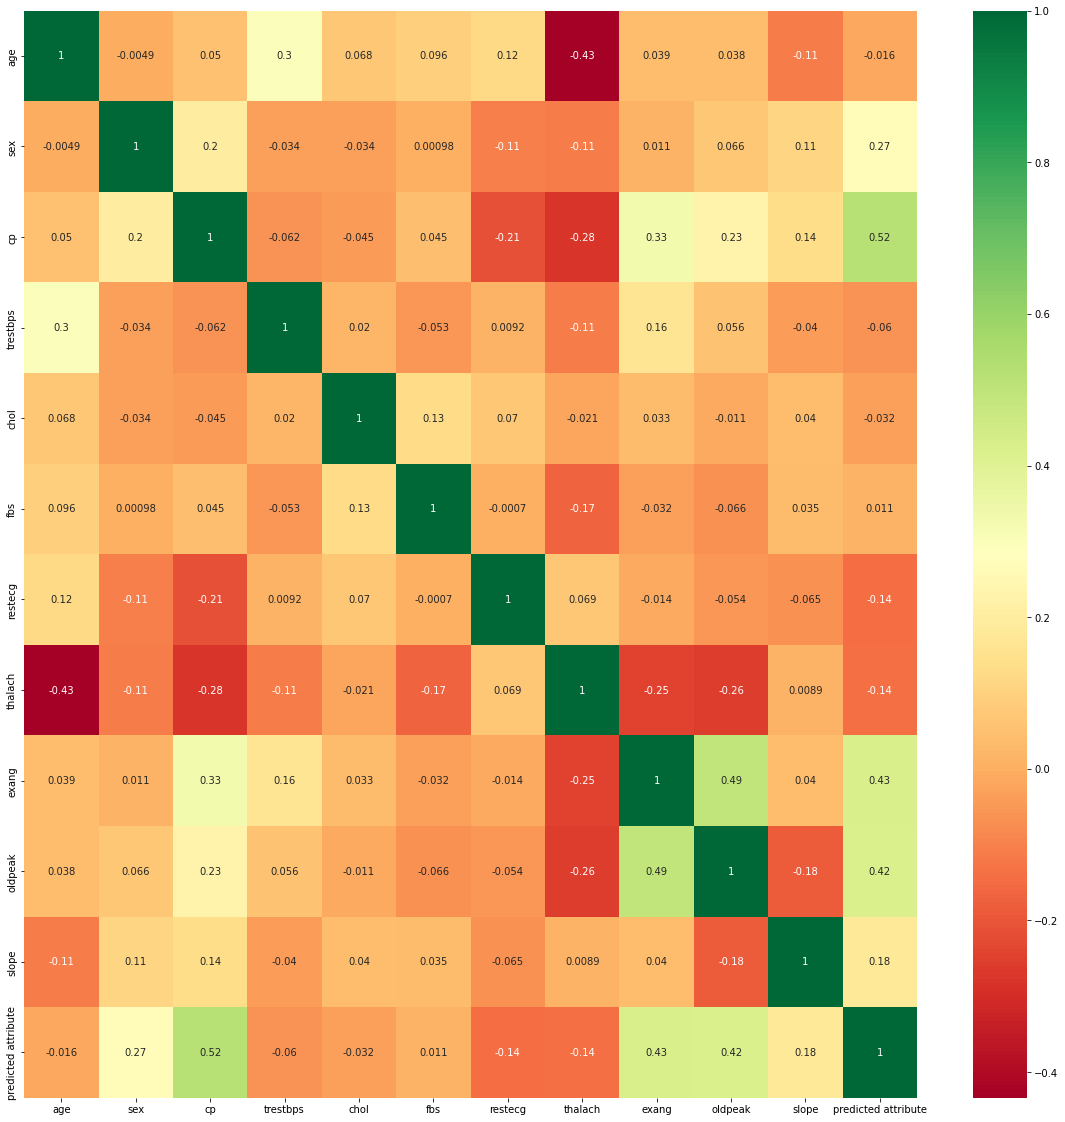

In [24]:
#correlation
corrmat = data6.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data6[top_corr_features].corr(),annot=True,cmap="RdYlGn")

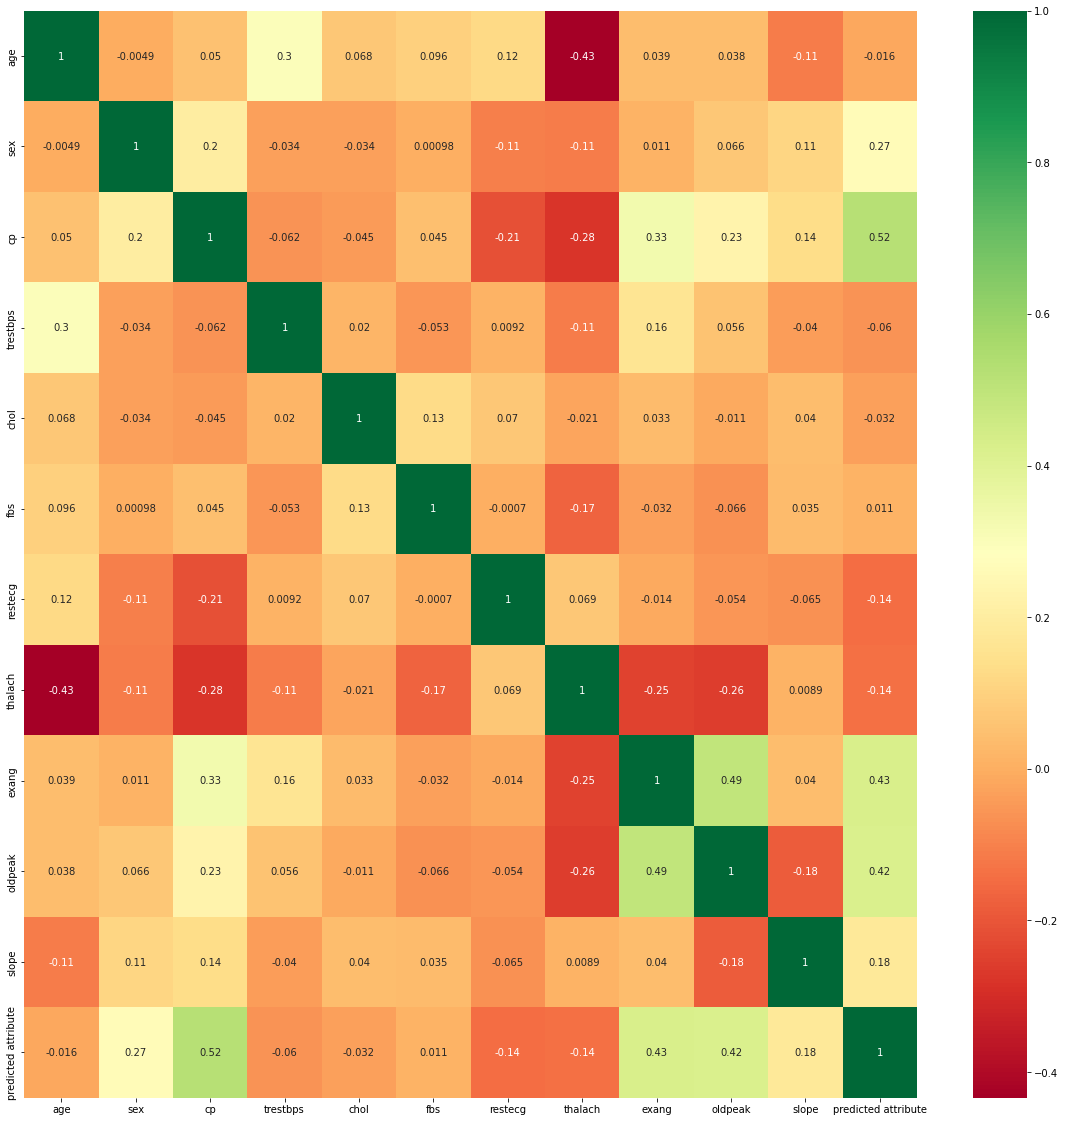

In [25]:
#correlation with normalized data
corrmat = normalized_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(normalized_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

korelasi tertinggi ada pada fitur oldpeak dengan exang (0.49)

# Modelling

In [26]:
#knn
from sklearn.neighbors import KNeighborsClassifier
#estimator di scikit learn adalah model
knn = KNeighborsClassifier(n_neighbors=1)
#n_neighbors aka tuning parameter for knn

#X = normalized_df.data
#y = normalized_df.target

Xn = data6.drop(['predicted attribute'], axis=1)
yn = data6['predicted attribute']

knn.fit(Xn, yn)

KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.predict([[48.0, 0, 4.0, 108,163.0,0,0,175.0,0,2,1]])

array([0.])

In [28]:
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.4, random_state=4)
print(Xn_train.shape)
print(Xn_test.shape)

(201, 11)
(134, 11)


In [29]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xn_train, yn_train)
yn_pred = knn.predict(Xn_test)
print(metrics.accuracy_score(yn_test, yn_pred))

0.8432835820895522


In [30]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimator=10,max_depth=10, random_state=1)
clf.fit(Xn_train, yn_train)
yn_pred = clf.predict(Xn_test)
print(metrics.accuracy_score(yn_test, yn_pred))

SyntaxError: invalid syntax (<ipython-input-30-5c873ce4ddb1>, line 3)